
Training Fold 1...


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


521/521 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.2003 - loss: 2.6241 - val_accuracy: 0.3407 - val_loss: 1.8287
Epoch 2/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.3546 - loss: 1.7528 - val_accuracy: 0.3060 - val_loss: 2.1555
Epoch 3/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.4135 - loss: 1.5989 - val_accuracy: 0.3649 - val_loss: 1.8467
Epoch 4/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.4596 - loss: 1.4944 - val_accuracy: 0.5230 - val_loss: 1.3278
Epoch 5/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.4975 - loss: 1.4144 - val_accuracy: 0.5369 - val_loss: 1.2897
Epoch 6/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.5230 - loss: 1.3365 - val_accuracy: 0.5949 - val_loss: 1.0998
Epoch 7/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.5402 - loss: 1.2974 - val_accuracy: 0.5361 - val_loss: 1.3448
Epoch 8/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.5557 - loss: 1.2692 - val_accurac

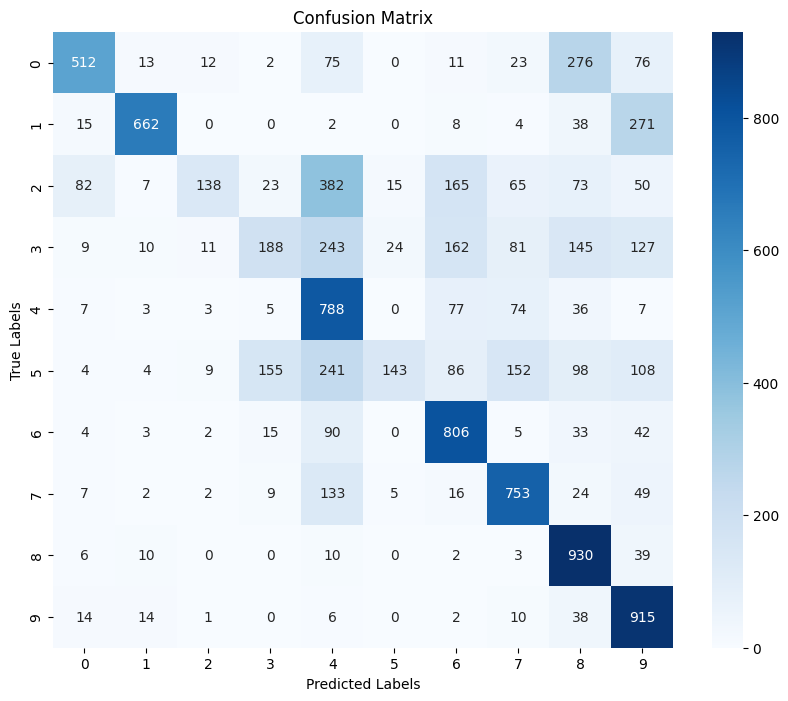

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.51      0.62      1000
           1       0.91      0.66      0.77      1000
           2       0.78      0.14      0.23      1000
           3       0.47      0.19      0.27      1000
           4       0.40      0.79      0.53      1000
           5       0.76      0.14      0.24      1000
           6       0.60      0.81      0.69      1000
           7       0.64      0.75      0.69      1000
           8       0.55      0.93      0.69      1000
           9       0.54      0.92      0.68      1000

    accuracy                           0.58     10000
   macro avg       0.64      0.58      0.54     10000
weighted avg       0.64      0.58      0.54     10000


Cross-Validation Results:
Fold 1: 65.67%
Fold 2: 62.27%
Fold 3: 62.74%
Average Cross-Validation Accuracy: 63.56%
Standard Deviation: 1.50%


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Load and preprocess CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Data Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Define model building function
def build_model(input_shape, num_classes):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
fold_no = 1
accuracy_per_fold = []

for train_idx, val_idx in kf.split(x_train):
    print(f"\nTraining Fold {fold_no}...")
    x_train_fold, x_val_fold = x_train[train_idx], x_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    model = build_model(x_train.shape[1:], num_classes)

    history = model.fit(
        datagen.flow(x_train_fold, y_train_fold, batch_size=64),
        epochs=10,  # Adjust to a smaller number for quicker testing
        validation_data=(x_val_fold, y_val_fold),
        verbose=1
    )

    # Evaluate on validation fold
    scores = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    print(f"Validation Accuracy for Fold {fold_no}: {scores[1] * 100:.2f}%")
    accuracy_per_fold.append(scores[1] * 100)
    fold_no += 1

# Calculate average cross-validation accuracy
average_accuracy = np.mean(accuracy_per_fold)
std_accuracy = np.std(accuracy_per_fold)

# Test the final model on x_test
final_model = build_model(x_train.shape[1:], num_classes)
final_model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=10, verbose=1)
test_scores = final_model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_scores[1] * 100:.2f}%")

# Plot confusion matrix
y_pred = final_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

# Print cross-validation accuracy
print("\nCross-Validation Results:")
for i, acc in enumerate(accuracy_per_fold, 1):
    print(f"Fold {i}: {acc:.2f}%")
print(f"Average Cross-Validation Accuracy: {average_accuracy:.2f}%")
print(f"Standard Deviation: {std_accuracy:.2f}%")
